# ONLY RUN THE NEXT THREE CELL's ONCE!

## Change the runtime Edit --> Notebook Settings --> Runtime Version --> 2025.07

# MC things to fix!
- File names, and paths to be consistent
- Add more comments and explanations

In [12]:
# Global variable to check if we're in Google Colab
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    ! pip install numpy==1.26.4
    ### The runtime will crash/restart after this

In [13]:
# Global variable to check if we're in Google Colab
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:

  !pip install -q condacolab #-U "git+https://github.com/mayankchetan/condacolab.git@py312update"
  import condacolab
  condacolab.install() #### expect a kernel restart

In [14]:
# Global variable to check if we're in Google Colab
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !git clone  https://github.com/wisdem/weis
    !git clone https://github.com/mayankchetan/weisWorkshop

    %cd weis
    !conda config --env --add pinned_packages "numpy<2.0"
    !mamba env update -n base -f environment.yml "python<3.13"
    %pip install .
    %cd ..
    %pip install "rosco==2.9.5"
    %pip install -U "git+https://github.com/NREL/ROSCO@v2.9.7"
    %pip install "orbit-nrel<1.2.2"
    %pip install gdown

else:
    try:
        import weis

    except ImportError:
        raise ImportError("Please install the weis package from https://github.com/wisdem/weis in the environment you are using to run this notebook.")

    Warning("Make sure you have cloned 'https://github.com/mayankchetan/weisWorkshop-Private' repository and are running the notebook from the root directory of the repository.")


In [15]:
# Downloading the precomputed data from Google Drive & extracting
# Drive link for non Google Colab users: https://drive.google.com/file/d/145BH393nzpT2msCVsHSBxR3Qy8KdpddI/view?usp=sharing
if IN_COLAB:
    !gdown 145BH393nzpT2msCVsHSBxR3Qy8KdpddI -O /content/weisWorkshop/archive_weisWorkshop_OCT25.tar.gz
    !tar -xvzf /content/weisWorkshop/archive_weisWorkshop_OCT25.tar.gz -C /content/weisWorkshop/
else:
    print("Please download the precomputed data from the link given in the notebook and extract it in the root directory of the repository.")
    print("you can use `tar -xvzf <downloaded_file_name>` to extract the files.")

Please download the precomputed data from the link given in the notebook and extract it in the root directory of the repository.
you can use `tar -xvzf <downloaded_file_name>` to extract the files.


# Welcome to session 3 of the WEIS workshop!
 > Write some info

# Recap
- In the last session, we ran the IEA 22MW floating wind turbine in WEIS, and established a baseline
- We modified the rotor diameter and rated power to create a 20MW turbine
- We optimized the rotor using WISDEM
- We inspected the optimization log using the log_opt.sql file, and plotted the convergence

# The next logical steps
- Now that we have a new rotor, we need to re-tune the controller so that we are not operating in an inefficient manner, and the loads on the system are better managed.
- We will use the ROSCO within WEIS to re-tune the controller for the new rotor.
- Using this new rotor and controller, we will begin to optimize the floating substructure to further reduce cost
- Finally, we will compare the baseline IEA 22MW turbine with the fully optimized 20MW turbine
- We'll also setup a subset of Design Load Cases (DLCs) to inspect the loads on the system

In [16]:
if IN_COLAB:
    # Now we try loading the weis_workshop module again
    sys.path.append('/content/weisWorkshop/jupyterNotebooks')

# Importing nesscary libraries.
import numpy as np
import matplotlib.pyplot as plt
from weis import weis_main
from wisdem import run_wisdem
import os
import copy
import pandas as pd

from weis_workshop import *

# set env variables
os.environ["OMP_NUM_THREADS"] = "1"  # export OMP_NUM_THREADS=1
os.environ["MKL_NUM_THREADS"] = "1"  # export MKL_NUM_THREADS=1

# workshop repository folder
if IN_COLAB:
    WORKSHOP_REPO = '/content/weisWorkshop'
else:
    WORKSHOP_REPO = os.path.join(os.getcwd(), '..')

# Now Focus on content and will make additional text, notes later

## Stage 4: Design Load Cases (DLCs) and load analysis

In [ ]:
# Setting up file paths
stageFolder = "stage-4-dlcs"

rec_data = load_OMsql(os.path.join(WORKSHOP_REPO, stageFolder,"outputs_preCompute/log_opt.sql")) # not sure what supresses the output here
plot_convergence(rec_data, ['raft.Max_PtfmPitch', 'raft.heave_period', 'raft.max_nac_accel', 'raft.pitch_period', 
                            'floatingse.constr_draft_heel_margin', 'floatingse.constr_fairlead_wave', 'floatingse.constr_fixed_margin', 
                            'floatingse.constr_freeboard_heel_margin', 'floatingse.metacentric_height_pitch', 'floatingse.metacentric_height_roll', 
                            'floatingse.constr_variable_margin', 'floatingse.system_structural_mass', 'floating.jointdv_0', 
                            'floating.jointdv_1', 'floating.memgrp1.outer_diameter_in'])


# Setting up the Optmization problem

<write some info>


## Analysis Options (just the important bits):
```yaml

design_variables:
  control:
    servo:
      pitch_control:
          omega:
            flag: True
            min: 0.025
            max: 0.5
          zeta:
            flag: True
            min: 0.1
            max: 3.0
          Kp_float:
            flag: True
            min: -40.0  # -0.25
            max: 0
          ptfm_freq:
            flag: True
            max: 0.5

merit_figure: DEL_TwrBsMyt  # Merit figure of the optimization problem. The options are 'AEP' - 'LCOE' - 'Cp' - 'blade_mass' - 'blade_tip_deflection'

constraints:
  control:
    rotor_overspeed:
      flag: True
      min: 0.0
      max: 0.2

driver:
  optimization:
    flag: True
    tol: 1.e-3            # Optimality tolerance
    max_iter: 200         # Maximum number of iterations (SLSQP)
    maxiter: 60          # Maximum number of iterations (SLSQP)
    solver: LN_COBYLA         # Optimization solver. Other options are 'SLSQP' - 'CONMIN'
    step_size: 1.e-3      # Step size for finite differencing
    form: forward         # Finite differencing mode, either forward or central
```

## Modeling Options (just the important bits):
``` yaml
General:
    verbosity: False  # When set to True, the code prints to screen many infos
    openfast_configuration:
        OF_run_fst: stage-2-controller
        save_iterations: True
        save_timeseries: True
        use_exe: True
        allow_fails: True
        fail_value: 9999
        write_stdout: True

WISDEM:
    RotorSE:
        flag: True
        n_pitch_perf_surfaces: 20
        n_tsr_perf_surfaces: 20
        spar_cap_ss: spar_cap_ss
        spar_cap_ps: spar_cap_ps
        peak_thrust_shaving: True
        thrust_shaving_coeff: 0.8
    TowerSE:
        flag: True
        wind: PowerWind  # Wind used
        gamma_f: 1.35    # Safety factor for fatigue loads
        gamma_m: 1.3     # Safety factor for material properties
        gamma_n: 1.0     # Safety factor for ...
        gamma_b: 1.1     # Safety factor for ...
        gamma_fatigue: 1.755  # Safety factor for fatigue loads
        buckling_method: dnvgl # Buckling code type [eurocode or dnvgl]
        buckling_length: 15    # Buckling parameter
        frame3dd:
            shear: True
            geom: True
            tol: 1e-9
    DriveSE:
        flag: True
    FloatingSE:
        flag: True
        symmetric_moorings: True
        gamma_f: 1.35    # Safety factor for fatigue loads
        gamma_m: 1.3     # Safety factor for material properties
        gamma_n: 1.0     # Safety factor for ...
        gamma_b: 1.1     # Safety factor for ...
        gamma_fatigue: 1.755  # Safety factor for fatigue loads
        rank_and_file: True
    BOS:
        flag: True

OpenFAST: # Options for WEIS fidelity level 3 = nonlinear time domain
    flag: True
    simulation:
        DT: 0.01
        CompElast: 1
        CompInflow: 1
        CompAero: 2
        CompServo: 1
        CompHydro: 1
        CompSub: 0
        CompMooring: 3
        CompIce: 0
        OutFileFmt: 3
        NumCrctn: 1
    ElastoDyn:
        FlapDOF1: True
        FlapDOF2: True
        EdgeDOF: True
        TeetDOF: False
        DrTrDOF: False
        GenDOF: True
        YawDOF: False
        TwFADOF1 : True
        TwFADOF2 : True
        TwSSDOF1 : True
        TwSSDOF2 : True
        PtfmSgDOF: True
        PtfmSwDOF: True
        PtfmHvDOF: True
        PtfmRDOF : True
        PtfmPDOF : True
        PtfmYDOF : True
RAFT:
    flag: True
    potential_model_override: 0
    trim_ballast: 2
    heave_tol: 1
    save_designs: True
ROSCO:
    flag: True
    tuning_yaml: ../source/iea22_rosco.yaml

DLC_driver:
    metocean_conditions:
        wind_speed: [4., 6., 8., 10., 12., 14., 16., 18., 20., 22., 24.]
        wave_height_NSS: [0.83, 0.88, 0.94, 1.03, 1.16, 1.34, 1.57, 1.86, 2.22, 2.62, 3.07]
        wave_period_NSS: [6.9, 6.96, 7.02, 7.12, 7.25, 7.43, 7.66, 7.94, 8.27, 8.63, 9.01]
        wave_height_SSS: [6.3, 8, 8, 8.1, 8.5, 8.5, 9.8, 9.8, 9.8, 9.8, 9.9]
        wave_period_SSS: [11.5, 12.7, 12.7, 12.8, 13.1, 13.1, 14.1, 14.1, 14.1, 14.1, 14.1]
        wave_height_1: 6.98
        wave_period_1: 11.7
        wave_height_50: 10.68
        wave_period_50: 14.2
    DLCs:
        - DLC: "1.1"
          n_seeds: 6
          transient_time: 120.0  # 0.
          analysis_time: 600.0  # 10.
```

In [18]:
# lets overide a few things so that we dont distrupt the existing results.
analysis_override = {}
analysis_override['general'] = {}
analysis_override['general']['folder_output'] = 'outputsCh1'
analysis_override['driver'] = {}
analysis_override['driver']['optimization'] = {}
analysis_override['driver']['optimization']['max_iter'] = 1 # only run one iteration for this demo, we have precomputed the solutions for you :)


modeling_override = {}
modeling_override['DLC_driver'] = {}
modeling_override['DLC_driver']['DLCs'] = [
    {'DLC': "1.1",
     'n_seeds': 1,
     'wind_speed': [20.0],
     'transient_time': 10.0,
     'analysis_time': 30.0}]

control_20mw, modeling_options, opt_options = weis_main(fname_wt_input, 
                                                 fname_modeling_options, 
                                                 fname_analysis_options,
                                                 analysis_override=analysis_override,
                                                 modeling_override=modeling_override,
                                                 test_run=False
                                                 )

/projects/weis/mchetan/weis-workshop/env/weis-workshop-script-main/lib/python3.12/site-packages/openmdao/core/driver.py:776: OpenMDAOWarning:NLoptDriver: No matches for pattern '*_df' in recording_options['excludes'].
/projects/weis/mchetan/weis-workshop/env/weis-workshop-script-main/lib/python3.12/site-packages/openmdao/recorders/sqlite_recorder.py:231: UserWarning:The existing case recorder file, /kfs2/projects/weis/mchetan/weis-workshop/_finalWorkshop/jupyterNotebooks/../stage-2-controller/outputsCh1/log_opt.sql, is being overwritten.
/projects/weis/mchetan/weis-workshop/env/weis-workshop-script-main/lib/python3.12/site-packages/openmdao/visualization/n2_viewer/n2_viewer.py:115: OpenMDAOWarning:All-NaN slice encountered


Driver debug print for iter coord: rank0:NLopt_LN_COBYLA|0
----------------------------------------------------------
Design Vars
{'tune_rosco_ivc.Kp_float': array([-0.14778082]),
 'tune_rosco_ivc.omega_pc': array([0.11468385, 0.12082643, 0.39598051]),
 'tune_rosco_ivc.ptfm_freq': array([0.27174842]),
 'tune_rosco_ivc.zeta_pc': array([1.46624485, 2.03006251, 1.81300686])}


wisdem.wt.wt_rna


NL: NLBGS 1 ; 5.98242626e+11 1


NL: NLBGS 2 ; 14029483 2.34511591e-05


NL: NLBGS 3 ; 0 0
NL: NLBGS Converged


Skipping duplicate mode.
Mode 13 (freq=5.425): MPF direction (0) disagrees with max displacement direction (1). Using displacement direction.


Cp-Ct-Cq surfaces completed at 5 %
Cp-Ct-Cq surfaces completed at 10 %
Cp-Ct-Cq surfaces completed at 15 %
Cp-Ct-Cq surfaces completed at 20 %
Cp-Ct-Cq surfaces completed at 25 %
Cp-Ct-Cq surfaces completed at 30 %
Cp-Ct-Cq surfaces completed at 35 %
Cp-Ct-Cq surfaces completed at 40 %
Cp-Ct-Cq surfaces completed at 45 %
Cp-Ct-Cq surfaces completed at 50 %
Cp-Ct-Cq surfaces completed at 55 %
Cp-Ct-Cq surfaces completed at 60 %
Cp-Ct-Cq surfaces completed at 65 %
Cp-Ct-Cq surfaces completed at 70 %
Cp-Ct-Cq surfaces completed at 75 %
Cp-Ct-Cq surfaces completed at 80 %
Cp-Ct-Cq surfaces completed at 85 %
Cp-Ct-Cq surfaces completed at 90 %
Cp-Ct-Cq surfaces completed at 95 %
Cp-Ct-Cq surfaces completed at 100 %
-----------------------------------------------------------------------------
   Tuning a reference wind turbine controller using NREL's ROSCO toolbox    
-----------------------------------------------------------------------------
Making FOWT
Mesh characteristic lengths: min=1.

unclosed file <_io.TextIOWrapper name='/kfs2/projects/weis/mchetan/weis-workshop/_finalWorkshop/stage-2-controller/outputsCh1/openfast_runs/DLC1.1_0_stage-2-controller_0_BeamDyn_Blade.dat' mode='w' encoding='UTF-8'>

Runtime: 	DLC1.1_0_stage-2-controller_0.fst = 66.47 s


########################################
Objectives
Turbine AEP: 171.8499061509 GWh
Blade Mass:  79932.3575470626 kg
LCOE:        49.7807296798 USD/MWh
Tip Defl.:   7.7381510735 m
Pitch PI gain inputs: omega_pc[0] = 0.115, zeta_pc[0] = 1.466
Floating Feedback: Kp_float = -0.148, ptfm_freq = 0.272
IPC Ki1p = 0.000e+00
IPC Ki1p = 0.000e+00
DEL(TwrBsMyt): 129374312.1183861941 Nm
rotor_overspeed: 6.3049255686 %
########################################
Nonlinear constraints
{'aeroelastic.rotor_overspeed': array([0.06304926]),
 'sse_tune.tune_rosco.PC_Ki': array([-0.06196435]),
 'sse_tune.tune_rosco.PC_Kp': array([-1.51748565])}

Linear constraints
None

Objectives
{'aeroelastic.DEL_TwrBsMyt': array([129374.31211839])}

Driver debug print for iter coord: rank0:NLopt_LN_COBYLA|1
----------------------------------------------------------
Design Vars
{'tune_rosco_ivc.Kp_float': array([-0.14778082]),
 'tune_rosco_ivc.omega_pc': array([0.11468385, 0.12082643, 0.39598051]),
 'tune_rosco_ivc.ptfm_f

NL: NLBGS 1 ; 0 0
NL: NLBGS Converged


Skipping duplicate mode.
Mode 13 (freq=5.425): MPF direction (0) disagrees with max displacement direction (1). Using displacement direction.


Cp-Ct-Cq surfaces completed at 5 %
Cp-Ct-Cq surfaces completed at 10 %
Cp-Ct-Cq surfaces completed at 15 %
Cp-Ct-Cq surfaces completed at 20 %
Cp-Ct-Cq surfaces completed at 25 %
Cp-Ct-Cq surfaces completed at 30 %
Cp-Ct-Cq surfaces completed at 35 %
Cp-Ct-Cq surfaces completed at 40 %
Cp-Ct-Cq surfaces completed at 45 %
Cp-Ct-Cq surfaces completed at 50 %
Cp-Ct-Cq surfaces completed at 55 %
Cp-Ct-Cq surfaces completed at 60 %
Cp-Ct-Cq surfaces completed at 65 %
Cp-Ct-Cq surfaces completed at 70 %
Cp-Ct-Cq surfaces completed at 75 %
Cp-Ct-Cq surfaces completed at 80 %
Cp-Ct-Cq surfaces completed at 85 %
Cp-Ct-Cq surfaces completed at 90 %
Cp-Ct-Cq surfaces completed at 95 %
Cp-Ct-Cq surfaces completed at 100 %
-----------------------------------------------------------------------------
   Tuning a reference wind turbine controller using NREL's ROSCO toolbox    
-----------------------------------------------------------------------------
Making FOWT
Mesh characteristic lengths: min=1.

unclosed file <_io.TextIOWrapper name='/kfs2/projects/weis/mchetan/weis-workshop/_finalWorkshop/stage-2-controller/outputsCh1/openfast_runs/DLC1.1_0_stage-2-controller_0_BeamDyn_Blade.dat' mode='w' encoding='UTF-8'>

Runtime: 	DLC1.1_0_stage-2-controller_0.fst = 65.68 s


########################################
Objectives
Turbine AEP: 171.8499061509 GWh
Blade Mass:  79932.3575470626 kg
LCOE:        49.7807296798 USD/MWh
Tip Defl.:   7.7381510735 m
Pitch PI gain inputs: omega_pc[0] = 0.115, zeta_pc[0] = 1.466
Floating Feedback: Kp_float = -0.148, ptfm_freq = 0.272
IPC Ki1p = 0.000e+00
IPC Ki1p = 0.000e+00
DEL(TwrBsMyt): 129374312.1183861941 Nm
rotor_overspeed: 6.3049255686 %
########################################
Nonlinear constraints
{'aeroelastic.rotor_overspeed': array([0.06304926]),
 'sse_tune.tune_rosco.PC_Ki': array([-0.06196435]),
 'sse_tune.tune_rosco.PC_Kp': array([-1.51748565])}

Linear constraints
None

Objectives
{'aeroelastic.DEL_TwrBsMyt': array([129374.31211839])}



Accessing Draft4Validator.resolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/referencing library, which provides more compliant referencing behavior as well as more flexible APIs for customization.

----------------
Design Variables
----------------
name                      val            size  indices  lower  upper  
------------------------  -------------  ----  -------  -----  ----- 
tune_rosco_ivc.omega_pc   |0.42959513|   3     None     0.025  0.5    
tune_rosco_ivc.zeta_pc    |3.09160503|   3     None     0.1    3.0    
tune_rosco_ivc.Kp_float   [-0.14778082]  1     None     -40.0  0.0    
tune_rosco_ivc.ptfm_freq  [0.27174842]   1     None     1e-05  0.5    

-----------
Constraints
-----------
name                         val            size  indices  alias  lower   upper  equals  
---------------------------  -------------  ----  -------  -----  ------  -----  ------ 
aeroelastic.rotor_overspeed  [0.06304926]   1     None     None   0.0     0.2    None    
sse_tune.tune_rosco.PC_Kp    [-1.51748565]  1     None     None   -1e+30  0.0    None    
sse_tune.tune_rosco.PC_Ki    [-0.06196435]  1     None     None   -1e+30  0.0    None    

----------
Objectives
----------
name

We will do the analysis of the controller tuning using the pre-computed results

loading /kfs2/projects/weis/mchetan/weis-workshop/_finalWorkshop/jupyterNotebooks/../stage-2-controller/outputs_preCompute/log_opt.sql


driver
rank0:NLopt_LN_COBYLA|0
rank0:NLopt_LN_COBYLA|1
rank0:NLopt_LN_COBYLA|2
rank0:NLopt_LN_COBYLA|3
rank0:NLopt_LN_COBYLA|4
rank0:NLopt_LN_COBYLA|5
rank0:NLopt_LN_COBYLA|6
rank0:NLopt_LN_COBYLA|7
rank0:NLopt_LN_COBYLA|8
rank0:NLopt_LN_COBYLA|9


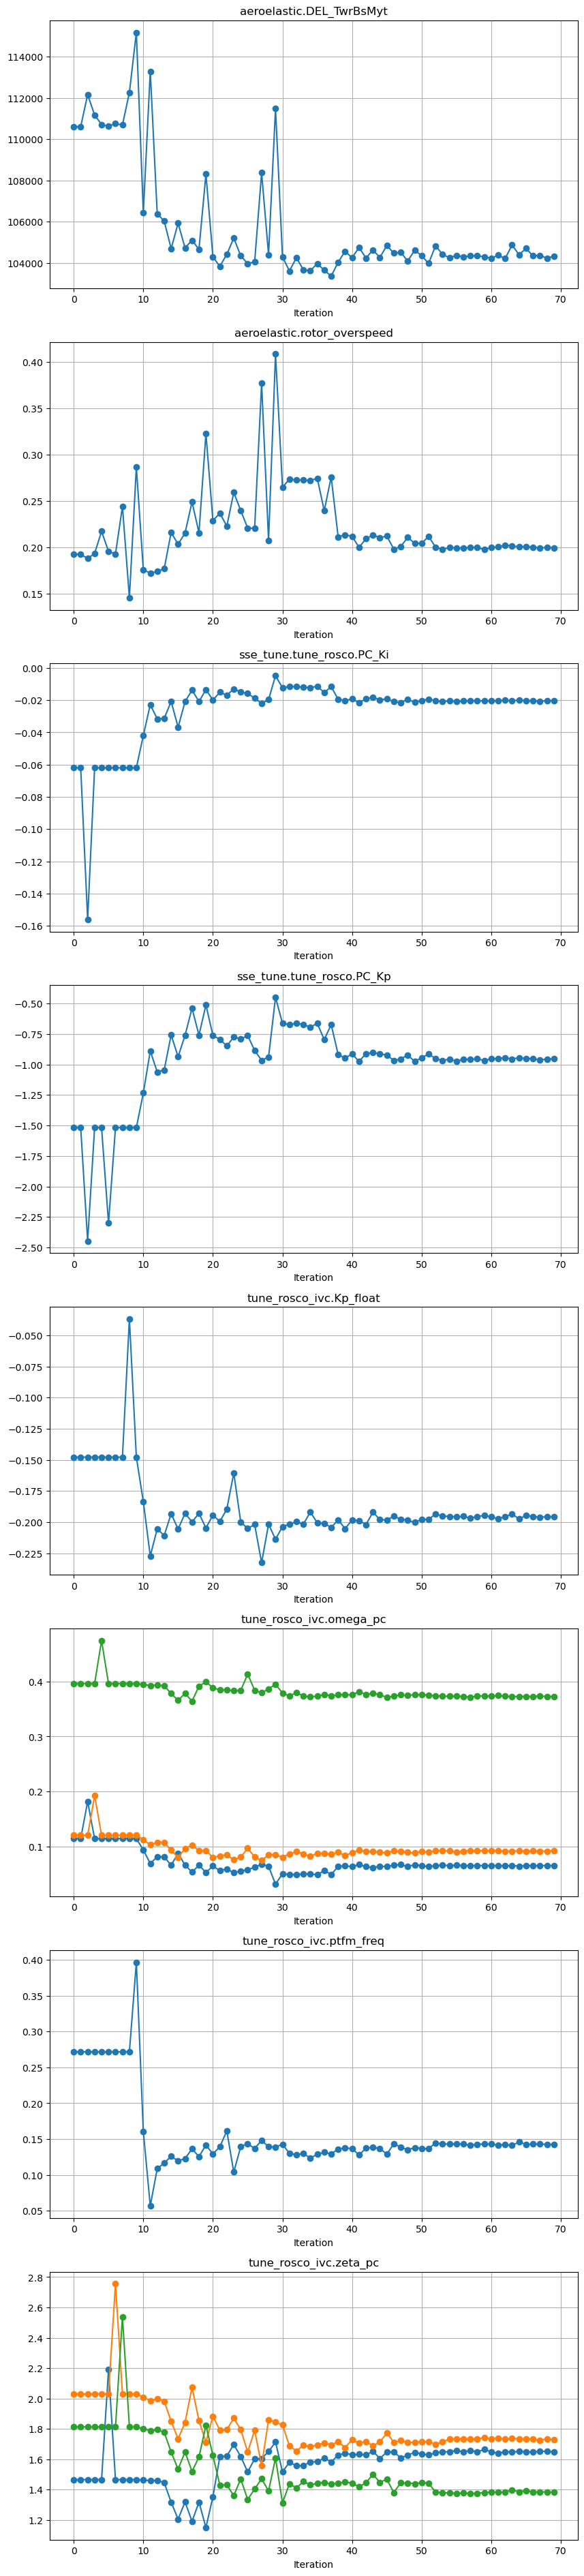

In [19]:
rec_data = load_OMsql(os.path.join(WORKSHOP_REPO, stageFolder,"outputs_preCompute/log_opt.sql")) # not sure what supresses the output here
plot_convergence(rec_data, ['aeroelastic.DEL_TwrBsMyt', 'aeroelastic.rotor_overspeed', 'sse_tune.tune_rosco.PC_Ki', 
                            'sse_tune.tune_rosco.PC_Kp', 'tune_rosco_ivc.Kp_float', 'tune_rosco_ivc.omega_pc', 
                            'tune_rosco_ivc.ptfm_freq', 'tune_rosco_ivc.zeta_pc'])

# Stage 3: Floating Substructure Optimization
- Now that we have a new rotor, we need to re-tune the controller so that we are not operating in an inefficient manner, and the loads on the system are better managed.
- We will follow Zalkind et al (2024) "Control Co-Design Studies for a 22 MW Semisubmersible Floating Wind Turbine Platform" DOI 10.1088/1742-6596/2767/8/082020 to set up the optimization problem
    - So the first step will be to use RAFT to size the floating substructure
    - Then we use the results from RAFT to set up the optimization problem using OpenFAST for higher fidelity analysis
    - We will use the pre-computed results for this part as well
    - We have also pre-computed a floater + controller Co-Design case

In [20]:
# Setting up file paths
stageFolder = "stage-3-semisub" # First the RAFT optimization

fname_wt_input = os.path.join(WORKSHOP_REPO, "stage-2-controller","outputs_preCompute", "stage-2-controller.yaml")
fname_modeling_options = os.path.join(WORKSHOP_REPO, stageFolder, f"stage-3-semisub_raft_modeling.yaml")
fname_analysis_options = os.path.join(WORKSHOP_REPO, stageFolder, f"stage-3-semisub_raft_analysis.yaml")

# Talk about input 


# We wont overide the modeling options since RAFT has lower computational cost, but limit it to a single iteration.

In [21]:
# lets overide a few things so that we dont distrupt the existing results.
analysis_override = {}
analysis_override['general'] = {}
analysis_override['general']['folder_output'] = 'outputsCh1'
analysis_override['driver'] = {}
analysis_override['driver']['optimization'] = {}
analysis_override['driver']['optimization']['max_iter'] = 1 # only run one iteration for this demo, we have precomputed the solutions for you :)


control_20mw, modeling_options, opt_options = weis_main(fname_wt_input, 
                                                 fname_modeling_options, 
                                                 fname_analysis_options,
                                                 analysis_override=analysis_override,
                                                #  modeling_override=modeling_override,
                                                 test_run=False
                                                 )

DLC 3.1 requires ROSCO v2.10 or greater. The case will run, but the startup or shutdown will not occur.
DLC 3.2 requires ROSCO v2.10 or greater. The case will run, but the startup or shutdown will not occur.
DLC 3.3 requires ROSCO v2.10 or greater. The case will run, but the startup or shutdown will not occur.
DLC 4.1 requires ROSCO v2.10 or greater. The case will run, but the startup or shutdown will not occur.
DLC 4.2 requires ROSCO v2.10 or greater. The case will run, but the startup or shutdown will not occur.
/projects/weis/mchetan/weis-workshop/env/weis-workshop-script-main/lib/python3.12/site-packages/openmdao/core/driver.py:776: OpenMDAOWarning:NLoptDriver: No matches for pattern '*_df' in recording_options['excludes'].
/projects/weis/mchetan/weis-workshop/env/weis-workshop-script-main/lib/python3.12/site-packages/openmdao/recorders/sqlite_recorder.py:231: UserWarning:The existing case recorder file, /kfs2/projects/weis/mchetan/weis-workshop/_finalWorkshop/jupyterNotebooks/../s

Driver debug print for iter coord: rank0:NLopt_LN_COBYLA|0
----------------------------------------------------------
Design Vars
{'floating.jointdv_0': array([-25.]),
 'floating.jointdv_1': array([65.]),
 'floating.memgrp1.outer_diameter_in': array([12.5])}


wisdem.wt.wt_rna


NL: NLBGS 1 ; 5.99205413e+11 1


NL: NLBGS 2 ; 14035082.8 2.34228237e-05


NL: NLBGS 3 ; 0 0
NL: NLBGS Converged


Skipping duplicate mode.
Mode 13 (freq=5.425): MPF direction (0) disagrees with max displacement direction (1). Using displacement direction.


Cp-Ct-Cq surfaces completed at 5 %
Cp-Ct-Cq surfaces completed at 10 %
Cp-Ct-Cq surfaces completed at 15 %
Cp-Ct-Cq surfaces completed at 20 %
Cp-Ct-Cq surfaces completed at 25 %
Cp-Ct-Cq surfaces completed at 30 %
Cp-Ct-Cq surfaces completed at 35 %
Cp-Ct-Cq surfaces completed at 40 %
Cp-Ct-Cq surfaces completed at 45 %
Cp-Ct-Cq surfaces completed at 50 %
Cp-Ct-Cq surfaces completed at 55 %
Cp-Ct-Cq surfaces completed at 60 %
Cp-Ct-Cq surfaces completed at 65 %
Cp-Ct-Cq surfaces completed at 70 %
Cp-Ct-Cq surfaces completed at 75 %
Cp-Ct-Cq surfaces completed at 80 %
Cp-Ct-Cq surfaces completed at 85 %
Cp-Ct-Cq surfaces completed at 90 %
Cp-Ct-Cq surfaces completed at 95 %
Cp-Ct-Cq surfaces completed at 100 %


DLC 3.1 requires ROSCO v2.10 or greater. The case will run, but the startup or shutdown will not occur.
DLC 3.2 requires ROSCO v2.10 or greater. The case will run, but the startup or shutdown will not occur.
DLC 3.3 requires ROSCO v2.10 or greater. The case will run, but the startup or shutdown will not occur.
DLC 4.1 requires ROSCO v2.10 or greater. The case will run, but the startup or shutdown will not occur.
DLC 4.2 requires ROSCO v2.10 or greater. The case will run, but the startup or shutdown will not occur.


-----------------------------------------------------------------------------
   Tuning a reference wind turbine controller using NREL's ROSCO toolbox    
-----------------------------------------------------------------------------
Making FOWT
Mesh characteristic lengths: min=1.0, max=3.0
adjusting ballast densities
Adjusting ballast to trim heave.
 Original sumFz is 6811 kN and heave is ~1.407 m
 Adjusting fill density by 45.732 kg/m over 15180.566 m3 of ballast
 New sumFz is 0 kN and heave is ~0.000 m
Found mean offets of FOWT 1 with surge =  0.27 m,  sway  =  0.00,  and heave =  0.00 m
                                 roll  =  0.00 deg, pitch = -1.16 deg, and yaw   =  0.00 deg
Wind speed: 3.00 m/s, Omega: 1.98 rpm, Cp: 0.426, T: 244 kN
Found mean offets of FOWT 1 with surge =  1.88 m,  sway  =  0.02,  and heave = -0.00 m
                                 roll  =  0.02 deg, pitch = -0.71 deg, and yaw   = -0.01 deg
Wind speed: 5.00 m/s, Omega: 3.24 rpm, Cp: 0.424, T: 725 kN
Found mean

NL: NLBGS 1 ; 0 0
NL: NLBGS Converged


Skipping duplicate mode.
Mode 13 (freq=5.425): MPF direction (0) disagrees with max displacement direction (1). Using displacement direction.


Cp-Ct-Cq surfaces completed at 5 %
Cp-Ct-Cq surfaces completed at 10 %
Cp-Ct-Cq surfaces completed at 15 %
Cp-Ct-Cq surfaces completed at 20 %
Cp-Ct-Cq surfaces completed at 25 %
Cp-Ct-Cq surfaces completed at 30 %
Cp-Ct-Cq surfaces completed at 35 %
Cp-Ct-Cq surfaces completed at 40 %
Cp-Ct-Cq surfaces completed at 45 %
Cp-Ct-Cq surfaces completed at 50 %
Cp-Ct-Cq surfaces completed at 55 %
Cp-Ct-Cq surfaces completed at 60 %
Cp-Ct-Cq surfaces completed at 65 %
Cp-Ct-Cq surfaces completed at 70 %
Cp-Ct-Cq surfaces completed at 75 %
Cp-Ct-Cq surfaces completed at 80 %
Cp-Ct-Cq surfaces completed at 85 %
Cp-Ct-Cq surfaces completed at 90 %
Cp-Ct-Cq surfaces completed at 95 %
Cp-Ct-Cq surfaces completed at 100 %


DLC 3.1 requires ROSCO v2.10 or greater. The case will run, but the startup or shutdown will not occur.
DLC 3.2 requires ROSCO v2.10 or greater. The case will run, but the startup or shutdown will not occur.
DLC 3.3 requires ROSCO v2.10 or greater. The case will run, but the startup or shutdown will not occur.
DLC 4.1 requires ROSCO v2.10 or greater. The case will run, but the startup or shutdown will not occur.
DLC 4.2 requires ROSCO v2.10 or greater. The case will run, but the startup or shutdown will not occur.


-----------------------------------------------------------------------------
   Tuning a reference wind turbine controller using NREL's ROSCO toolbox    
-----------------------------------------------------------------------------
Making FOWT
Mesh characteristic lengths: min=1.0, max=3.0
adjusting ballast densities
Adjusting ballast to trim heave.
 Original sumFz is 6811 kN and heave is ~1.407 m
 Adjusting fill density by 45.732 kg/m over 15180.566 m3 of ballast
 New sumFz is 0 kN and heave is ~0.000 m
Found mean offets of FOWT 1 with surge =  0.27 m,  sway  =  0.00,  and heave =  0.00 m
                                 roll  =  0.00 deg, pitch = -1.16 deg, and yaw   =  0.00 deg
Wind speed: 3.00 m/s, Omega: 1.98 rpm, Cp: 0.426, T: 244 kN
Found mean offets of FOWT 1 with surge =  1.88 m,  sway  =  0.02,  and heave = -0.00 m
                                 roll  =  0.02 deg, pitch = -0.71 deg, and yaw   = -0.01 deg
Wind speed: 5.00 m/s, Omega: 3.24 rpm, Cp: 0.424, T: 725 kN
Found mean

Accessing Draft4Validator.resolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/referencing library, which provides more compliant referencing behavior as well as more flexible APIs for customization.

----------------
Design Variables
----------------
name                                val     size  indices  lower  upper  
----------------------------------  ------  ----  -------  -----  ----- 
floating.jointdv_0                  [-25.]  1     None     -30.0  -12.0  
floating.jointdv_1                  [65.]   1     None     35.0   75.0   
floating.memgrp1.outer_diameter_in  [12.5]  1     None     10.0   16.0   

-----------
Constraints
-----------
name                                     val            size  indices  alias  lower   upper  equals  
---------------------------------------  -------------  ----  -------  -----  ------  -----  ------ 
floatingse.constr_fixed_margin           |0.0|          7     None     None   -1e+30  1.0    None    
floatingse.constr_variable_margin        [0.82435429]   1     None     None   0.0     1.0    None    
floatingse.metacentric_height_roll       [18.36495057]  1     None     None   1.0     1e+30  None    
floatingse.metacentric_height_pitc

loading /kfs2/projects/weis/mchetan/weis-workshop/_finalWorkshop/jupyterNotebooks/../stage-3-semisub/outputs_preCompute/log_opt.sql


driver
rank0:NLopt_LN_COBYLA|0
rank0:NLopt_LN_COBYLA|1
rank0:NLopt_LN_COBYLA|2
rank0:NLopt_LN_COBYLA|3
rank0:NLopt_LN_COBYLA|4
rank0:NLopt_LN_COBYLA|5
rank0:NLopt_LN_COBYLA|6
rank0:NLopt_LN_COBYLA|7
rank0:NLopt_LN_COBYLA|8
rank0:NLopt_LN_COBYLA|9


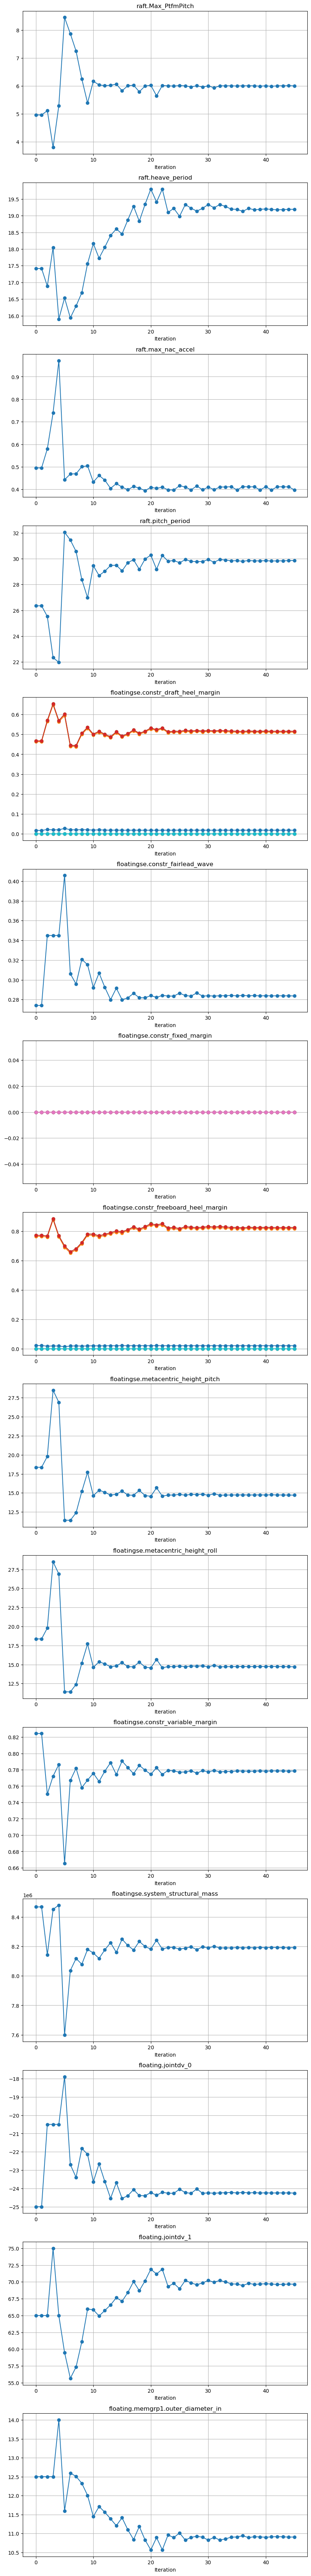

In [22]:
rec_data = load_OMsql(os.path.join(WORKSHOP_REPO, stageFolder,"outputs_preCompute/log_opt.sql")) # not sure what supresses the output here
plot_convergence(rec_data, ['raft.Max_PtfmPitch', 'raft.heave_period', 'raft.max_nac_accel', 'raft.pitch_period', 
                            'floatingse.constr_draft_heel_margin', 'floatingse.constr_fairlead_wave', 'floatingse.constr_fixed_margin', 
                            'floatingse.constr_freeboard_heel_margin', 'floatingse.metacentric_height_pitch', 'floatingse.metacentric_height_roll', 
                            'floatingse.constr_variable_margin', 'floatingse.system_structural_mass', 'floating.jointdv_0', 
                            'floating.jointdv_1', 'floating.memgrp1.outer_diameter_in'])





# Re-optimization of the substructure using OpenFAST


In [ ]:
# Setting up file paths
stageFolder = "stage-3-semisub"

fname_wt_input = os.path.join(WORKSHOP_REPO, stageFolder,"outputs_preCompute", "stage-3-semisub_raft.yaml")
fname_modeling_options = os.path.join(WORKSHOP_REPO, stageFolder, f"stage-3-semisub_of_modeling.yaml")
fname_analysis_options = os.path.join(WORKSHOP_REPO, stageFolder, f"stage-3-semisub_of_analysis.yaml")


In [ ]:
# lets overide a few things so that we dont distrupt the existing results.
analysis_override = {}
analysis_override['general'] = {}
analysis_override['general']['folder_output'] = 'outputsCh1'
analysis_override['driver'] = {}
analysis_override['driver']['optimization'] = {}
analysis_override['driver']['optimization']['max_iter'] = 1 # only run one iteration for this demo, we have precomputed the solutions for you :)

modeling_override = {}
modeling_override['DLC_driver'] = {}
modeling_override['DLC_driver']['DLCs'] = [
    {'DLC': "1.1",
     'n_seeds': 1,
     'wind_speed': [20.0],
     'transient_time': 10.0,
     'analysis_time': 30.0}]

control_20mw, modeling_options, opt_options = weis_main(fname_wt_input, 
                                                 fname_modeling_options, 
                                                 fname_analysis_options,
                                                 analysis_override=analysis_override,
                                                 modeling_override=modeling_override,
                                                 test_run=False
                                                 )


In [ ]:
rec_data = load_OMsql(os.path.join(WORKSHOP_REPO, stageFolder,"outputs_of_preCompute/log_opt.sql")) # not sure what supresses the output here
plot_convergence(rec_data, ['raft.Max_PtfmPitch', 'raft.heave_period', 'raft.max_nac_accel', 'raft.pitch_period', 
                            'floatingse.constr_draft_heel_margin', 'floatingse.constr_fairlead_wave', 'floatingse.constr_fixed_margin', 
                            'floatingse.constr_freeboard_heel_margin', 'floatingse.metacentric_height_pitch', 'floatingse.metacentric_height_roll', 
                            'floatingse.constr_variable_margin', 'floatingse.system_structural_mass', 'floating.jointdv_0', 
                            'floating.jointdv_1', 'floating.memgrp1.outer_diameter_in'])


# Loading in a CCD case

In [ ]:
stageFolder = "stage-3.5-semisubCCD" # First the RAFT optimization

rec_data = load_OMsql(os.path.join(WORKSHOP_REPO, stageFolder,"outputs_of_preCompute/log_opt.sql")) # not sure what supresses the output here
plot_convergence(rec_data, ['raft.Max_PtfmPitch', 'raft.heave_period', 'raft.max_nac_accel', 'raft.pitch_period', 
                            'floatingse.constr_draft_heel_margin', 'floatingse.constr_fairlead_wave', 'floatingse.constr_fixed_margin', 
                            'floatingse.constr_freeboard_heel_margin', 'floatingse.metacentric_height_pitch', 'floatingse.metacentric_height_roll', 
                            'floatingse.constr_variable_margin', 'floatingse.system_structural_mass', 'floating.jointdv_0', 
                            'floating.jointdv_1', 'floating.memgrp1.outer_diameter_in'])


